In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train_input = "/content/train_text_seq.csv"
test_input = "/content/test_text_seq.csv"
df = pd.read_csv(train_input)
df.head()
X = df['input_str']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Making plots to find nature of dataset

In [ ]:
# Count the number of samples with label = 1
count_label_1 = df[df['label'] == 1].shape[0]

# Count the number of samples with label = 0
count_label_0 = df[df['label'] == 0].shape[0]

print(f"Number of samples with label = 1: {count_label_1}")
print(f"Number of samples with label = 0: {count_label_0}")


Number of samples with label = 1: 3504
Number of samples with label = 0: 3576


Using LSTM to see if its sequential

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Tokenizing the characters
tokenizer = Tokenizer(char_level=True)  # Character-level tokenizer
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size

# Convert strings to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure equal length
max_len = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# LSTM Model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=16, validation_data=(X_test_padded, y_test))
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.5209 - loss: 0.6910 - val_accuracy: 0.6172 - val_loss: 0.6542
Epoch 2/5
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6046 - loss: 0.6615 - val_accuracy: 0.6398 - val_loss: 0.6381
Epoch 3/5
354/354 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6087 - loss: 0.6524 - val_accuracy: 0.6328 - val_loss: 0.6364
Epoch 4/5
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6106 - loss: 0.6488 - val_accuracy: 0.6412 - val_loss: 0.6246
Epoch 5/5
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6345 - loss: 0.6346 - val_accuracy: 0.6490 - val_loss: 0.6231
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6616 - loss: 0.6241
Test Loss: 0.6231127977371216
Test Accuracy: 0.6490113139152527


Uisng a non-sequantial model(logistic regression) with BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Bag of Characters (Character Frequency)
vectorizer = CountVectorizer(analyzer='char', lowercase=False)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Logistic Regression Model
clf = LogisticRegression()
clf.fit(X_train_bow, y_train)

# Evaluate model
y_pred_bow = clf.predict(X_test_bow)
print("Bag of Characters Model Accuracy:", accuracy_score(y_test, y_pred_bow))


Bag of Characters Model Accuracy: 0.4837570621468927


Now we shuffle the characters in each string to see if that affects the accuracy

In [ ]:
import random

def shuffle_string(s):
    s = list(s)
    random.shuffle(s)
    return ''.join(s)

# Shuffle characters in the strings
X_train_shuffled = X_train.apply(shuffle_string)
X_test_shuffled = X_test.apply(shuffle_string)

# Convert shuffled data to sequences
X_train_shuffled_seq = tokenizer.texts_to_sequences(X_train_shuffled)
X_test_shuffled_seq = tokenizer.texts_to_sequences(X_test_shuffled)

# Pad sequences
X_train_shuffled_padded = pad_sequences(X_train_shuffled_seq, maxlen=max_len, padding='post')
X_test_shuffled_padded = pad_sequences(X_test_shuffled_seq, maxlen=max_len, padding='post')

# Train LSTM on shuffled data
model.fit(X_train_shuffled_padded, y_train, epochs=5, batch_size=16, validation_data=(X_test_shuffled_padded, y_test))
test_loss, test_accuracy = model.evaluate(X_test_shuffled_padded, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/5
354/354 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4994 - loss: 0.6950 - val_accuracy: 0.5042 - val_loss: 0.6927
Epoch 2/5
354/354 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5114 - loss: 0.6941 - val_accuracy: 0.5177 - val_loss: 0.6928
Epoch 3/5
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5118 - loss: 0.6928 - val_accuracy: 0.5141 - val_loss: 0.6930
Epoch 4/5
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5200 - loss: 0.6932 - val_accuracy: 0.5085 - val_loss: 0.6934
Epoch 5/5
354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.5081 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6940
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5113 - loss: 0.6925
Test Loss: 0.6940383911132812
Test Accuracy: 0.5


Preprocessor function for the basic models below

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# Function to one-hot encode a single string of length 50
def one_hot_encode_string(s):
    # Create a matrix of shape (50, 10) for each character in the string
    one_hot = np.zeros((50, 10))
    for i, char in enumerate(s):
        one_hot[i, int(char)] = 1  # Set the corresponding position to 1
    return one_hot.flatten()  # Flatten the (50, 10) matrix into a 500-dimensional vector

# Function to load data into a DataFrame and preprocess it
def load_and_preprocess_data(filepath):
    # Load the dataset into a DataFrame
    df = pd.read_csv(filepath)

    # One-hot encode the 'string' column
    X = np.array([one_hot_encode_string(s) for s in df['input_str']])

    # Extract labels from the 'label' column
    y = df['label'].values
    return X, y

# Paths to the train and test datasets
train_input = "/content/train_text_seq.csv"
test_input = "/content/valid_text_seq.csv"

# Load and preprocess the training and test data
X_train, y_train = load_and_preprocess_data(train_input)
X_test, y_test = load_and_preprocess_data(test_input)

Using basic models : Randomforest, XGBoost, Logistic regression and KNNs

In [ ]:
# Function to perform Grid Search and print results
def perform_grid_search(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print(f"Best hyperparameters for {model.__class__.__name__}: {best_params}")

    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy with best hyperparameters for {model.__class__.__name__}: {accuracy * 100:.2f}%")

    # Get number of parameters (features + intercept)
    n_features = X_train.shape[1]
    if hasattr(grid_search.best_estimator_, 'n_estimators'):
        n_params = grid_search.best_estimator_.n_estimators * n_features  # For ensemble methods
    else:
        n_params = n_features + 1  # For other models (including Logistic Regression)

    print(f"Number of parameters being used in {model.__class__.__name__}: {n_params}\n")

# KNN Hyperparameter tuning
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
perform_grid_search(knn_model, knn_param_grid)

# Random Forest Hyperparameter tuning
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}
perform_grid_search(rf_model, rf_param_grid)

# XGBoost Hyperparameter tuning
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
perform_grid_search(xgb_model, xgb_param_grid)

# Logistic Regression Hyperparameter tuning (already shown in previous code)
lwp_model = LogisticRegression()
lwp_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 500]
}
perform_grid_search(lwp_model, lwp_param_grid)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Test Accuracy with best hyperparameters for KNeighborsClassifier: 56.24%
Number of parameters being used in KNeighborsClassifier: 501



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best hyperparameters for RandomForestClassifier: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy with best hyperparameters for RandomForestClassifier: 64.21%
Number of parameters being used in RandomForestClassifier: 100000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:34:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:34:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:34:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:34:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:34:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best hyperparameters for XGBClassifier: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Test Accuracy with best hyperparameters for XGBClassifier: 68.71%
Number of parameters being used in XGBClassifier: 100000

Best hyperparameters for LogisticRegression: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy with best hyperparameters for LogisticRegression: 64.83%
Number of parameters being used in LogisticRegression: 501



Preprocessing functions : using tokenizer

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd

train_input = "/content/train_text_seq.csv"
test_input = "/content/valid_text_seq.csv"

# Function to preprocess data (character-level tokenization)
def preprocess_data(strings, max_length):
    tokenizer = Tokenizer(char_level=True)  # Tokenizer will work on characters
    tokenizer.fit_on_texts(strings)
    sequences = tokenizer.texts_to_sequences(strings)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    vocab_size = len(tokenizer.word_index) + 1  # size of the character vocabulary
    return padded_sequences, vocab_size

MAX_LENGTH = 50  # Fixed length of each string
TEST_SIZE = 0.2
# Load training and test data
train_data = pd.read_csv(train_input)  # Assuming CSV with columns ['text', 'label']
test_data = pd.read_csv(test_input)

# Preprocess training data and split into training and validation sets
X_train_full, vocab_size_train = preprocess_data(train_data['input_str'].values, MAX_LENGTH)

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, train_data['label'].values, test_size=TEST_SIZE, random_state=42)

# Preprocess test data
X_test, vocab_size_test = preprocess_data(test_data['input_str'].values, MAX_LENGTH)

# Use the vocabulary size from the training set
vocab_size = vocab_size_train

# Get the binary labels for test data
y_test = test_data['label'].values

RNN model

In [7]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Hyperparameters
EMBEDDING_DIM = 50  # Embedding size
TEST_SIZE = 0.2  # Proportion of data for validation split

# RNN Model using SimpleRNN instead of LSTM
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH))
rnn_model.add(SimpleRNN(64, return_sequences=False))  # SimpleRNN layer with 32 units
rnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_val, y_val))

# Evaluate RNN accuracy
_, rnn_test_acc = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"RNN Test Accuracy: {rnn_test_acc:.4f}")
print(f"RNN Model Summary: {rnn_model.summary()}")

# Extract features from the RNN layer (before the final Dense layer)
feature_extractor_rnn = Sequential(rnn_model.layers[:-1])  # Remove last Dense layer
train_rnn_features = feature_extractor_rnn.predict(X_train)
val_rnn_features = feature_extractor_rnn.predict(X_val)
test_rnn_features = feature_extractor_rnn.predict(X_test)

# Reuse the evaluate_classifier function to train classifiers on RNN-extracted features
def evaluate_classifier_rnn(clf, clf_name):
    # Train classifier on the extracted RNN features
    clf.fit(train_rnn_features, y_train)

    # Predict on the test set using the classifier
    y_pred = clf.predict(test_rnn_features)

    # Evaluate accuracy on the test set
    test_acc = accuracy_score(y_test, y_pred)
    print(f"{clf_name} on RNN-Extracted Features Test Accuracy: {test_acc:.4f}")

# 1. RandomForest Classifier on RNN features
rf_classifier = RandomForestClassifier(n_estimators=100)
evaluate_classifier_rnn(rf_classifier, "RandomForest")

# 2. XGBoost Classifier on RNN features
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_classifier_rnn(xgb_classifier, "XGBoost")

# 3. Logistic Regression Classifier on RNN features
logreg_classifier = LogisticRegression(max_iter=1000)
evaluate_classifier_rnn(logreg_classifier, "Logistic Regression")

# 4. SVM Classifier on RNN features
svm_classifier = SVC()
evaluate_classifier_rnn(svm_classifier, "SVM")


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5193 - loss: 0.6923 - val_accuracy: 0.5784 - val_loss: 0.6720
Epoch 2/15
354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6117 - loss: 0.6608 - val_accuracy: 0.6003 - val_loss: 0.6573
Epoch 3/15
354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6145 - loss: 0.6576 - val_accuracy: 0.6017 - val_loss: 0.6550
Epoch 4/15
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6283 - loss: 0.6478 - val_accuracy: 0.6504 - val_loss: 0.6375
Epoch 5/15
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6402 - loss: 0.6383 - val_accuracy: 0.6561 - val_loss: 0.6238
Epoch 6/15
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6226 - loss: 0.6408 - val_accuracy: 0.6829 - val_loss: 0.6152
Epoch 7/15
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6593 - loss: 0.6205 - val_accuracy: 0.6730 - val_loss: 0.6140
Epoch 8/15
354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6642 - loss: 0.6091 - val_accuracy: 0.68

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (16, 50, 50)                │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (16, 64)                    │           7,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (16, 1)                     │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,927 (93.47 KB)

 Trainable params: 7,975 (31.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,952 (62.32 KB)

RNN Model Summary: None
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RandomForest on RNN-Extracted Features Test Accuracy: 0.6830


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:12:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost on RNN-Extracted Features Test Accuracy: 0.6646
Logistic Regression on RNN-Extracted Features Test Accuracy: 0.6973
SVM on RNN-Extracted Features Test Accuracy: 0.7076


RNN model without embeddings

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Assume X_train and X_val are already numerical sequences (e.g., one-hot encoded)
# For instance, shape of X_train could be (num_samples, sequence_length, num_features)
# where `num_features` is the size of the one-hot encoding or other feature size.

# Model configuration
SEQUENCE_LENGTH = 50  # Length of the input sequences
NUM_FEATURES = vocab_size  # Number of input features (e.g., one-hot vector size)
HIDDEN_UNITS = 32  # Number of units in the RNN layer

# RNN model without Embedding layer
rnn_model = Sequential()

# Add the SimpleRNN layer. Since we don't have embeddings, input is expected to be
# a sequence of numerical values (one-hot encoded or other feature representations).
rnn_model.add(SimpleRNN(HIDDEN_UNITS, input_shape=(SEQUENCE_LENGTH, NUM_FEATURES), return_sequences=False))

# Add the output layer for binary classification
rnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
print(rnn_model.summary())

# Train the RNN model
rnn_model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_val, y_val))

# Evaluate the RNN model
_, rnn_test_acc = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"RNN Test Accuracy: {rnn_test_acc:.4f}")
print(rnn_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 32)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_9_1/Cast:0", shape=(16, 50), dtype=float32). Expected shape (None, 50, 11), but input has incompatible shape (16, 50)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(16, 50), dtype=int32)
  • training=True
  • mask=None

CNN best model

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5018 - loss: 0.6933 - val_accuracy: 0.5353 - val_loss: 0.6926
Epoch 2/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5365 - loss: 0.6914 - val_accuracy: 0.5410 - val_loss: 0.6907
Epoch 3/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5683 - loss: 0.6839 - val_accuracy: 0.6081 - val_loss: 0.6685
Epoch 4/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6019 - loss: 0.6572 - val_accuracy: 0.6653 - val_loss: 0.6235
Epoch 5/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6513 - loss: 0.6179 - val_accuracy: 0.7274 - val_loss: 0.5660
Epoch 6/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7137 - loss: 0.5610 - val_accuracy: 0.7669 - val_loss: 0.4921
Epoch 7/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7602 - loss: 0.5018 - val_accuracy: 0.7952 - val_loss: 0.4594
Epoch 8/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7794 - loss: 0.4620 - val_accuracy: 0.8206 - val_

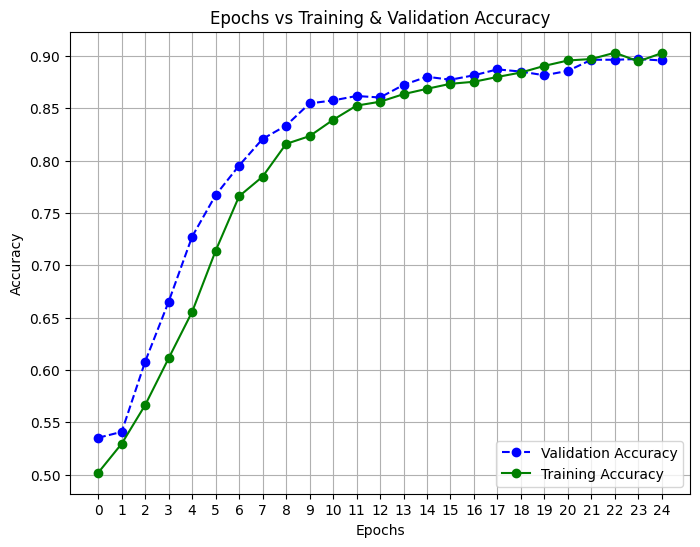

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Classical CNN Test Accuracy: 0.9366


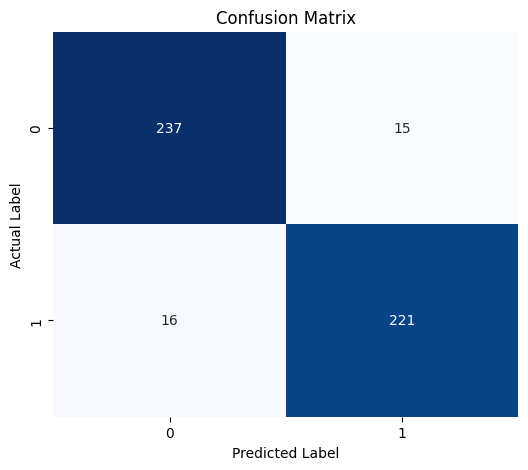

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       252
           1       0.94      0.93      0.93       237

    accuracy                           0.94       489
   macro avg       0.94      0.94      0.94       489
weighted avg       0.94      0.94      0.94       489



Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)             │ (16, 50, 50)                │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_92 (Conv1D)                   │ (16, 48, 32)                │           4,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_93 (Conv1D)                   │ (16, 46, 16)                │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_94 (Conv1D)                   │ (16, 44, 8)                 │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_95 (Conv1D)                   │ (16, 42, 8)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (16, 42, 8)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (16, 336)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (16, 1)                     │             337 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,591 (92.16 KB)

 Trainable params: 7,863 (30.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,728 (61.44 KB)

None
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test accuracy for RandomForest : 0.8895705521472392


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:42:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test accuracy for XGBoost : 0.885480572597137
Test accuracy for Logistic Regression : 0.9222903885480572
Number of parameters in Logistic Regression for split : 337
Test accuracy for SVM : 0.9161554192229039
Number of support vectors in SVM for split : 882


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, AveragePooling1D
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
# Hyperparameters

def set_seed(seed_value=42):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)

MAX_LENGTH = 50  # Fixed length of each string
TEST_SIZE = 0.2  # Proportion of data for validation split
set_seed(42)

embedding_dim = 50
num_filters_1 = 32
num_filters_2 = 16
num_filters_3 = 8
num_filters_4 = 8
kernel_size = 3
sequence_length = 50
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    Conv1D(filters=num_filters_1, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters_2, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters_3, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters_4, kernel_size=kernel_size, activation='relu'),
    Dropout(0.5),
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping callback to stop training when the validation accuracy stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor
    patience=3,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights from the epoch with the best validation loss
)

# Train the CNN model and store the history
history = cnn_model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_val, y_val))

# Plotting Epochs vs Validation Accuracy
plt.figure(figsize=(8, 6))

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='--', color='b')
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', color='g')
plt.title('Epochs vs Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 25, step=1))  # Set x-ticks for each epoch
plt.grid(True)
plt.legend(loc='lower right')  # Legend for the plot
plt.show()

# Evaluate classical CNN accuracy on the test data
y_pred_prob = cnn_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Print test accuracy
_, cnn_test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Classical CNN Test Accuracy: {cnn_test_acc:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Model Summary
print(cnn_model.summary())

# Extract features from the CNN layer (before the final Dense layer)
feature_extractor_cnn = Sequential(cnn_model.layers[:-1])  # Remove last Dense layer
train_cnn_features = feature_extractor_cnn.predict(X_train)
val_cnn_features = feature_extractor_cnn.predict(X_val)
test_cnn_features = feature_extractor_cnn.predict(X_test)

# Function to evaluate classifiers on CNN-extracted features
def evaluate_classifier_cnn(clf, clf_name):
    clf.fit(train_cnn_features, y_train)
    y_pred = clf.predict(test_cnn_features)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {clf_name} : {test_acc}")

# 1. RandomForest Classifier on CNN features
rf_classifier = RandomForestClassifier(n_estimators=100)
evaluate_classifier_cnn(rf_classifier, "RandomForest")

# 2. XGBoost Classifier on CNN features
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_classifier_cnn(xgb_classifier, "XGBoost")

# 3. Logistic Regression Classifier on CNN features
logreg_classifier = LogisticRegression(max_iter=1000, C=0.1, penalty='l2', solver='liblinear')
evaluate_classifier_cnn(logreg_classifier, "Logistic Regression")

# Print the number of parameters in Logistic Regression
n_params_logreg = logreg_classifier.coef_.size + logreg_classifier.intercept_.size
print(f"Number of parameters in Logistic Regression for split : {n_params_logreg}")

# 4. SVM Classifier on CNN features
svm_classifier = SVC(C=1, gamma='scale', kernel='linear')
evaluate_classifier_cnn(svm_classifier, "SVM")

# Print the number of support vectors in SVM
n_support_vectors = svm_classifier.support_vectors_.shape[0]
print(f"Number of support vectors in SVM for split : {n_support_vectors}")

Experimenting with embedding dimensions and validation accuracies

Epoch 1/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4931 - loss: 0.6935 - val_accuracy: 0.5078 - val_loss: 0.6931
Epoch 2/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5087 - loss: 0.6932 - val_accuracy: 0.5078 - val_loss: 0.6931
Epoch 3/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5087 - loss: 0.6931 - val_accuracy: 0.5078 - val_loss: 0.6931
Epoch 4/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5087 - loss: 0.6931 - val_accuracy: 0.5078 - val_loss: 0.6931
Epoch 5/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5087 - loss: 0.6931 - val_accuracy: 0.5078 - val_loss: 0.6931
Epoch 6/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5087 - loss: 0.6931 - val_accuracy: 0.5078 - val_loss: 0.6931
Epoch 7/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5087 - loss: 0.6931 - val_accuracy: 0.5078 - val_loss: 0.6931
Epoch 8/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5087 - loss: 0.6931 - val_accuracy: 0.

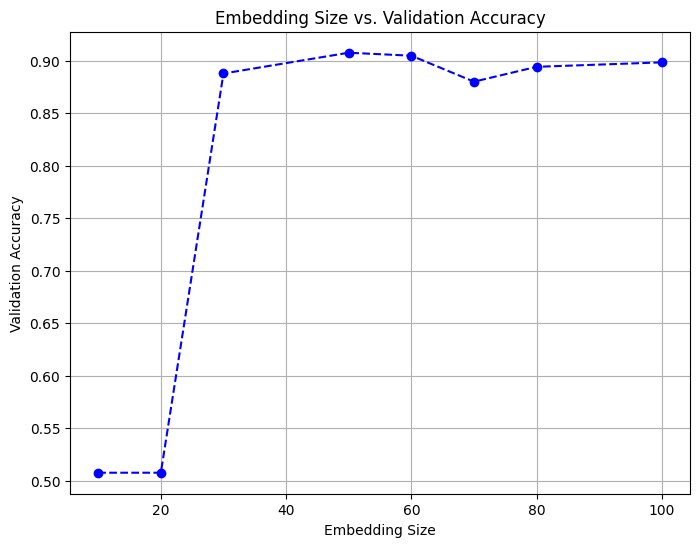

In [ ]:
from tensorflow.keras.optimizers import Adam
# Define a range of embedding sizes to test
embedding_sizes = [10, 20, 30, 50, 60, 70, 80, 100]
validation_accuracies = []

# Iterate over different embedding sizes
for embedding_dim in embedding_sizes:
    # Create CNN model
    cnn_model = Sequential([
      Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
      Conv1D(filters=num_filters_1, kernel_size=kernel_size, activation='relu'),
      Conv1D(filters=num_filters_2, kernel_size=kernel_size, activation='relu'),
      Conv1D(filters=num_filters_3, kernel_size=kernel_size, activation='relu'),
      Conv1D(filters=num_filters_3, kernel_size=kernel_size, activation='relu'),
      Dropout(0.5),
      Flatten(),
      Dense(1, activation='sigmoid')  # Binary classification
  ])

    # Compile the model
    cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # Train the CNN model
    history = cnn_model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_val, y_val), verbose=1)

    # Store the validation accuracy
    val_acc = max(history.history['val_accuracy'])
    validation_accuracies.append(val_acc)
    print(f"Embedding Size: {embedding_dim}, Validation Accuracy: {val_acc}")

# Plot Embedding Size vs. Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(embedding_sizes, validation_accuracies, marker='o', linestyle='--', color='b')
plt.title('Embedding Size vs. Validation Accuracy')
plt.xlabel('Embedding Size')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

Using another classifier at the end

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4979 - loss: 0.6934 - val_accuracy: 0.5056 - val_loss: 0.6929
Epoch 2/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5113 - loss: 0.6930 - val_accuracy: 0.5565 - val_loss: 0.6887
Epoch 3/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5622 - loss: 0.6839 - val_accuracy: 0.6349 - val_loss: 0.6508
Epoch 4/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6538 - loss: 0.6267 - val_accuracy: 0.7556 - val_loss: 0.5230
Epoch 5/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7406 - loss: 0.5281 - val_accuracy: 0.7903 - val_loss: 0.4545
Epoch 6/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7741 - loss: 0.4690 - val_accuracy: 0.8150 - val_loss: 0.4081
Epoch 7/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7965 - loss: 0.4247 - val_accuracy: 0.8199 - val_loss: 0.3668
Epoch 8/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8018 - loss: 0.4121 - val_accuracy: 0.8234 - 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in Logistic Regression for split 0.2: 337
Number of support vectors in SVM for split 0.2: 897
Split = 0.2 completed.


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.5388 - val_loss: 0.6922
Epoch 2/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5053 - loss: 0.6923 - val_accuracy: 0.6391 - val_loss: 0.6680
Epoch 3/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6159 - loss: 0.6509 - val_accuracy: 0.7373 - val_loss: 0.5325
Epoch 4/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7375 - loss: 0.5287 - val_accuracy: 0.7867 - val_loss: 0.4460
Epoch 5/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7771 - loss: 0.4668 - val_accuracy: 0.8150 - val_loss: 0.3971
Epoch 6/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7974 - loss: 0.4223 - val_accuracy: 0.8411 - val_loss: 0.3534
Epoch 7/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8318 - loss: 0.3751 - val_accuracy: 0.8637 - val_loss: 0.3175
Epoch 8/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8455 - loss: 0.3567 - val_accuracy: 0.8729 - val_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:48:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in Logistic Regression for split 0.4: 337
Number of support vectors in SVM for split 0.4: 732
Split = 0.4 completed.


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4838 - loss: 0.6937 - val_accuracy: 0.5085 - val_loss: 0.6928
Epoch 2/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5161 - loss: 0.6913 - val_accuracy: 0.5925 - val_loss: 0.6616
Epoch 3/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6116 - loss: 0.6562 - val_accuracy: 0.7119 - val_loss: 0.5906
Epoch 4/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7149 - loss: 0.5611 - val_accuracy: 0.7564 - val_loss: 0.4895
Epoch 5/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7537 - loss: 0.5073 - val_accuracy: 0.7987 - val_loss: 0.4476
Epoch 6/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7759 - loss: 0.4598 - val_accuracy: 0.8164 - val_loss: 0.4183
Epoch 7/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7980 - loss: 0.4255 - val_accuracy: 0.8213 - val_loss: 0.4086
Epoch 8/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8165 - loss: 0.3952 - val_accuracy: 0.8362 - val_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:50:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in Logistic Regression for split 0.6: 337
Number of support vectors in SVM for split 0.6: 979
Split = 0.6 completed.


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5233 - val_loss: 0.6927
Epoch 2/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.5219 - val_loss: 0.6906
Epoch 3/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5369 - loss: 0.6901 - val_accuracy: 0.5975 - val_loss: 0.6713
Epoch 4/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5755 - loss: 0.6735 - val_accuracy: 0.6575 - val_loss: 0.6341
Epoch 5/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6386 - loss: 0.6313 - val_accuracy: 0.6843 - val_loss: 0.5886
Epoch 6/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6765 - loss: 0.5959 - val_accuracy: 0.7034 - val_loss: 0.5570
Epoch 7/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7061 - loss: 0.5677 - val_accuracy: 0.7599 - val_loss: 0.5152
Epoch 8/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7273 - loss: 0.5380 - val_accuracy: 0.7867 - val_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:51:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in Logistic Regression for split 0.8: 337
Number of support vectors in SVM for split 0.8: 942
Split = 0.8 completed.


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5071 - loss: 0.6934 - val_accuracy: 0.5085 - val_loss: 0.6928
Epoch 2/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4940 - loss: 0.6931 - val_accuracy: 0.5381 - val_loss: 0.6865
Epoch 3/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5847 - loss: 0.6673 - val_accuracy: 0.7027 - val_loss: 0.5785
Epoch 4/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6883 - loss: 0.5817 - val_accuracy: 0.7514 - val_loss: 0.5114
Epoch 5/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7474 - loss: 0.5150 - val_accuracy: 0.7832 - val_loss: 0.4601
Epoch 6/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7740 - loss: 0.4591 - val_accuracy: 0.8185 - val_loss: 0.3997
Epoch 7/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8081 - loss: 0.4117 - val_accuracy: 0.8475 - val_loss: 0.3577
Epoch 8/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8256 - loss: 0.3805 - val_accuracy: 0.8588 - val_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:52:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in Logistic Regression for split 1.0: 337
Number of support vectors in SVM for split 1.0: 719
Split = 1.0 completed.



Average accuracies for each model:
CNN: 0.8949
RandomForest: 0.8765
XGBoost: 0.8658
Logistic Regression: 0.8920
SVM: 0.8904

Accuracies of all models for each split:
          CNN  RandomForest   XGBoost  Logistic Regression       SVM
0.2  0.889571      0.873211  0.869121             0.893661  0.895706
0.4  0.895706      0.893661  0.875256             0.897751  0.895706
0.6  0.899795      0.867076  0.858896             0.885481  0.879346
0.8  0.901841      0.877301  0.871166             0.897751  0.895706
1.0  0.887526      0.871166  0.854806             0.885481  0.885481


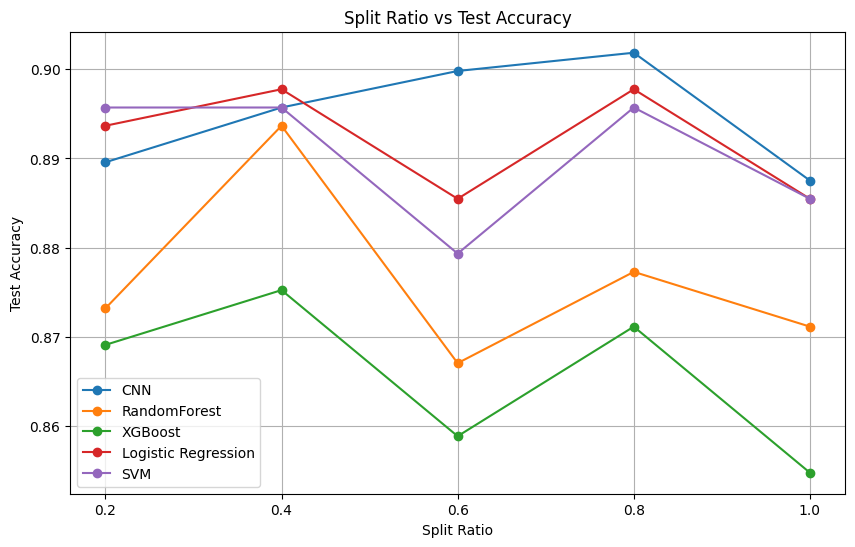

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

split_ratios = [0.2, 0.4, 0.6, 0.8, 1.0]
MAX_LENGTH = 50  # Fixed length of each string
TEST_SIZE = 0.2  # Proportion of data for validation split
embedding_dim = 50
num_filters_1 = 32
num_filters_2 = 16
num_filters_3 = 8
kernel_size = 3
sequence_length = 50

test_accuracies = {
    "CNN": [],
    "RandomForest": [],
    "XGBoost": [],
    "Logistic Regression": [],
    "SVM": []
}

set_seed(1)

for split in split_ratios:
    # CNN model definition
    cnn_model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
        Conv1D(filters=num_filters_1, kernel_size=kernel_size, activation='relu'),
        Conv1D(filters=num_filters_2, kernel_size=kernel_size, activation='relu'),
        Conv1D(filters=num_filters_3, kernel_size=kernel_size, activation='relu'),
        Conv1D(filters=num_filters_3, kernel_size=kernel_size, activation='relu'),
        Dropout(0.5),
        Flatten(),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the CNN model
    cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(
      monitor='val_loss',    # Metric to monitor
      patience=3,            # Number of epochs with no improvement after which training will be stopped
      restore_best_weights=True  # Restore the weights from the epoch with the best validation loss
  )

    # Train the CNN model (classical CNN)
    cnn_model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_val, y_val))

    # Evaluate classical CNN accuracy (using the Dense layer for classification)
    _, cnn_test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
    test_accuracies["CNN"].append(cnn_test_acc)

    # Print the number of parameters in the CNN model
    total_params = cnn_model.count_params()
    print(f"Total parameters in CNN model for split {split}: {total_params}")

    # Extract features from the CNN layer (before the final Dense layer)
    feature_extractor_cnn = Sequential(cnn_model.layers[:-1])  # Remove last Dense layer
    train_cnn_features = feature_extractor_cnn.predict(X_train)
    val_cnn_features = feature_extractor_cnn.predict(X_val)
    test_cnn_features = feature_extractor_cnn.predict(X_test)

    # Function to evaluate classifiers on CNN-extracted features
    def evaluate_classifier_cnn(clf, clf_name):
        clf.fit(train_cnn_features, y_train)
        y_pred = clf.predict(test_cnn_features)
        test_acc = accuracy_score(y_test, y_pred)
        test_accuracies[clf_name].append(test_acc)

    # 1. RandomForest Classifier on CNN features
    rf_classifier = RandomForestClassifier(n_estimators=100)
    evaluate_classifier_cnn(rf_classifier, "RandomForest")

    # 2. XGBoost Classifier on CNN features
    xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    evaluate_classifier_cnn(xgb_classifier, "XGBoost")

    # 3. Logistic Regression Classifier on CNN features
    logreg_classifier = LogisticRegression(max_iter=1000, C=0.1, penalty='l2', solver='liblinear')
    evaluate_classifier_cnn(logreg_classifier, "Logistic Regression")

    # Print the number of parameters in Logistic Regression
    n_params_logreg = logreg_classifier.coef_.size + logreg_classifier.intercept_.size
    print(f"Number of parameters in Logistic Regression for split {split}: {n_params_logreg}")

    # 4. SVM Classifier on CNN features
    svm_classifier = SVC(C=1, gamma='scale', kernel='linear')
    evaluate_classifier_cnn(svm_classifier, "SVM")

    # Print the number of support vectors in SVM
    n_support_vectors = svm_classifier.support_vectors_.shape[0]
    print(f"Number of support vectors in SVM for split {split}: {n_support_vectors}")

    print(f"Split = {split} completed.\n\n")

# Calculate average accuracy for each model
avg_accuracies = {model: np.mean(acc) for model, acc in test_accuracies.items()}
print("\nAverage accuracies for each model:")
for model, avg_acc in avg_accuracies.items():
    print(f"{model}: {avg_acc:.4f}")

# Print table of accuracies for all models and splits
df_accuracies = pd.DataFrame(test_accuracies, index=split_ratios)
print("\nAccuracies of all models for each split:")
print(df_accuracies)

# Plot split ratio vs test accuracy for each classifier
plt.figure(figsize=(10, 6))
for clf_name, accuracies in test_accuracies.items():
    plt.plot(split_ratios, accuracies, marker='o', label=clf_name)

plt.title('Split Ratio vs Test Accuracy')
plt.xlabel('Split Ratio')
plt.ylabel('Test Accuracy')
plt.xticks(split_ratios)
plt.grid(True)
plt.legend()
plt.show()


sumbission final model

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


354/354 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5018 - loss: 0.6933 - val_accuracy: 0.5353 - val_loss: 0.6926
Epoch 2/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5365 - loss: 0.6914 - val_accuracy: 0.5410 - val_loss: 0.6907
Epoch 3/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5683 - loss: 0.6839 - val_accuracy: 0.6081 - val_loss: 0.6685
Epoch 4/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6019 - loss: 0.6572 - val_accuracy: 0.6653 - val_loss: 0.6235
Epoch 5/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6513 - loss: 0.6179 - val_accuracy: 0.7274 - val_loss: 0.5660
Epoch 6/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7137 - loss: 0.5610 - val_accuracy: 0.7669 - val_loss: 0.4921
Epoch 7/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7602 - loss: 0.5018 - val_accuracy: 0.7952 - val_loss: 0.4594
Epoch 8/25
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7794 - loss: 0.4620 - val_accuracy: 0.8206 - val_

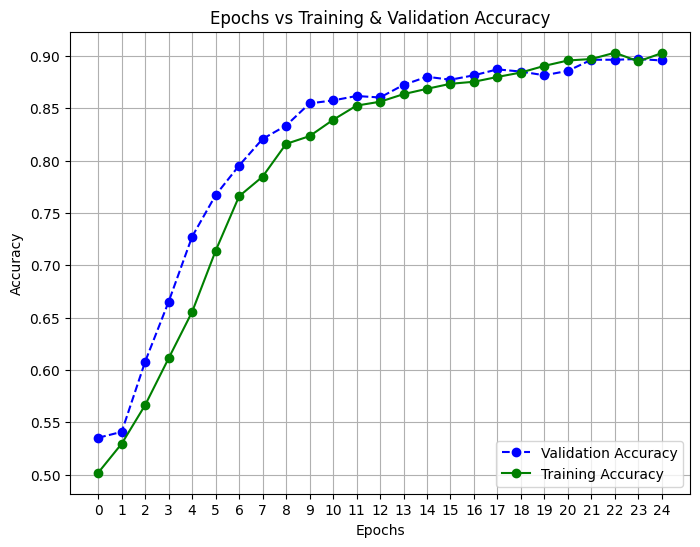

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Classical CNN Test Accuracy: 0.9366


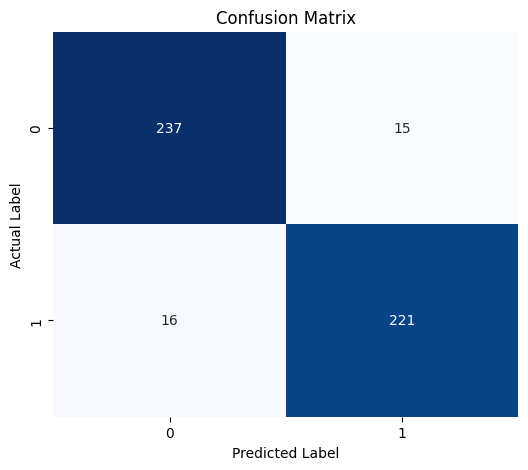

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       252
           1       0.94      0.93      0.93       237

    accuracy                           0.94       489
   macro avg       0.94      0.94      0.94       489
weighted avg       0.94      0.94      0.94       489



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (16, 50, 50)                │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (16, 48, 32)                │           4,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (16, 46, 16)                │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (16, 44, 8)                 │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (16, 42, 8)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (16, 42, 8)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (16, 336)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (16, 1)                     │             337 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,591 (92.16 KB)

 Trainable params: 7,863 (30.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,728 (61.44 KB)

None


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, AveragePooling1D
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
# Hyperparameters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import random

train_input = "/content/train_text_seq.csv"
test_input = "/content/valid_text_seq.csv"

def set_seed(seed_value=42):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)
    # tf.keras.utils.set_random_seed(seed_value)

set_seed(42)

# Function to preprocess data (character-level tokenization)
def preprocess_data(strings, max_length):
    tokenizer = Tokenizer(char_level=True)  # Tokenizer will work on characters
    tokenizer.fit_on_texts(strings)
    sequences = tokenizer.texts_to_sequences(strings)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    vocab_size = len(tokenizer.word_index) + 1  # size of the character vocabulary
    return padded_sequences, vocab_size

MAX_LENGTH = 50  # Fixed length of each string
TEST_SIZE = 0.2
# Load training and test data
train_data = pd.read_csv(train_input)  # Assuming CSV with columns ['text', 'label']
test_data = pd.read_csv(test_input)

# Preprocess training data and split into training and validation sets
X_train_full, vocab_size_train = preprocess_data(train_data['input_str'].values, MAX_LENGTH)

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, train_data['label'].values, test_size=TEST_SIZE, random_state=42)

# Preprocess test data
X_test, vocab_size_test = preprocess_data(test_data['input_str'].values, MAX_LENGTH)

# Use the vocabulary size from the training set
vocab_size = vocab_size_train

# Get the binary labels for test data
y_test = test_data['label'].values



MAX_LENGTH = 50  # Fixed length of each string
TEST_SIZE = 0.2  # Proportion of data for validation split


embedding_dim = 50
num_filters_1 = 32
num_filters_2 = 16
num_filters_3 = 8
num_filters_4 = 8
kernel_size = 3
sequence_length = 50
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    Conv1D(filters=num_filters_1, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters_2, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters_3, kernel_size=kernel_size, activation='relu'),
    Conv1D(filters=num_filters_4, kernel_size=kernel_size, activation='relu'),
    Dropout(0.5),
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping callback to stop training when the validation accuracy stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor
    patience=3,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights from the epoch with the best validation loss
)

# Train the CNN model and store the history
history = cnn_model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_val, y_val))

# Plotting Epochs vs Validation Accuracy
plt.figure(figsize=(8, 6))

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='--', color='b')
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', color='g')
plt.title('Epochs vs Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 25, step=1))  # Set x-ticks for each epoch
plt.grid(True)
plt.legend(loc='lower right')  # Legend for the plot
plt.show()

# Evaluate classical CNN accuracy on the test data
y_pred_prob = cnn_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Print test accuracy
_, cnn_test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Classical CNN Test Accuracy: {cnn_test_acc:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Model Summary
print(cnn_model.summary())